In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import gridspec

%matplotlib inline

In [32]:

fname_20 = "./PPS_long_local_meas/icap_channel_0.log"
T0 = np.genfromtxt(fname_20, delimiter=',',dtype='int64')

fname_21 = "./PPS_long_local_meas/icap_channel_2.log"
T1 = np.genfromtxt(fname_21, delimiter=',',dtype='int64')


pps1 = T0[1:,0];
pps2 = T1[1:,0];

ts = pps1-pps1[0];

dif = np.array(pps1-pps2,dtype='float');
dif = dif[30:20000];
ts = ts[30:20000];

Mean difference: 79.012018
Difference standard deviation: 74.588105
Maximum absolute difference: 350


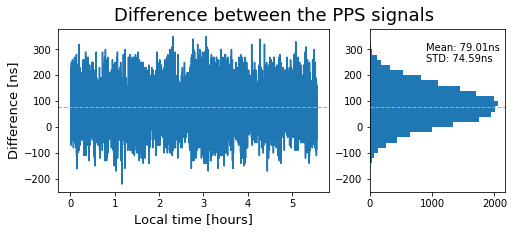

In [52]:
f = figure(figsize=(8,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
p1 = plt.subplot(gs[0])
p2 = plt.subplot(gs[1])

f.suptitle(u'Difference between the PPS signals',fontsize=18);

plot_bottom = np.min(dif)-30;
plot_top = np.max(dif)+30;

p1.plot( ts * 1e-9 /60 /60, dif);
p1.axhline(np.mean(dif), color='y', linestyle='dashed', linewidth=1)
p1.set_xlabel(u'Local time [hours]',fontsize=13)
p1.set_ylabel(u'Difference [ns]',fontsize=13);
p1.set_ylim(bottom=plot_bottom,top=plot_top)

print "Mean difference: %f" % np.mean(dif);
print "Difference standard deviation: %f" % np.std(dif)
print "Maximum absolute difference: %d" % np.max(np.abs(dif))

bins = np.arange(-200,350,20)
p2.hist(dif,bins=bins,orientation='horizontal');
p2.axhline(np.mean(dif), color='y', linestyle='dashed', linewidth=1)
p2.text(900,250,u'Mean: %.2fns\nSTD: %.2fns' % (np.mean(dif), np.std(dif)))
p2.set_ylim(bottom=plot_bottom,top=plot_top)

savefig("./PPS_long_local_meas/delta",bbox_inches = "tight")


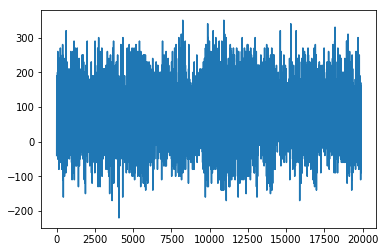

In [22]:
plot(dif[100:20000])